ACTOR CRITIC MODEL MULTI UAV


Training UAV 1...

Episode 1/1000, Total Reward: -341
Episode 2/1000, Total Reward: -144
Episode 3/1000, Total Reward: -62
Episode 4/1000, Total Reward: -30
Episode 5/1000, Total Reward: -1
Episode 6/1000, Total Reward: 5
Episode 7/1000, Total Reward: 1
Episode 8/1000, Total Reward: 3
Episode 9/1000, Total Reward: 0
Episode 10/1000, Total Reward: 3
Episode 11/1000, Total Reward: 5
Episode 12/1000, Total Reward: 5
Episode 13/1000, Total Reward: 5
Episode 14/1000, Total Reward: 5
Episode 15/1000, Total Reward: 5
Episode 16/1000, Total Reward: 5
Episode 17/1000, Total Reward: 0
Episode 18/1000, Total Reward: 5
Episode 19/1000, Total Reward: 5
Episode 20/1000, Total Reward: 5
Episode 21/1000, Total Reward: 0
Episode 22/1000, Total Reward: 0
Episode 23/1000, Total Reward: 5
Episode 24/1000, Total Reward: 5
Episode 25/1000, Total Reward: 5
Episode 26/1000, Total Reward: 5
Episode 27/1000, Total Reward: 5
Episode 28/1000, Total Reward: 3
Episode 29/1000, Total Reward: 5
Episode 30/1000, Tota

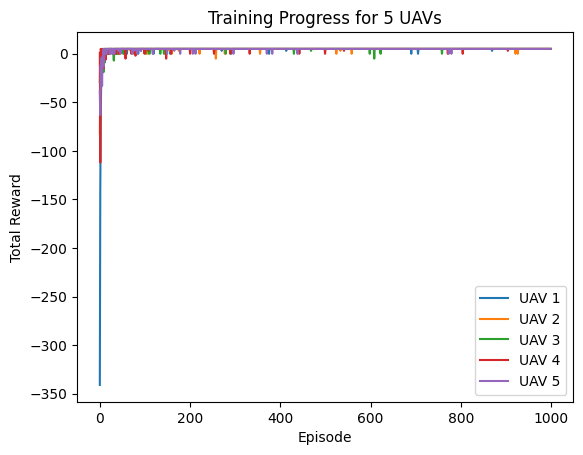

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
import matplotlib.pyplot as plt

# UAV Environment
class EnhancedSmallUAVEnv:
    def __init__(self):
        self.position = [0, 0]
        self.goal = [3, 3]
        self.actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        self.grid_size = 4

    def reset(self):
        self.position = [0, 0]
        return self.get_state()

    def get_state(self):
        dx = self.goal[0] - self.position[0]
        dy = self.goal[1] - self.position[1]
        return [self.position[0], self.position[1], dx, dy]

    def step(self, action):
        new_position = [self.position[0] + self.actions[action][0], self.position[1] + self.actions[action][1]]
        if new_position[0] < 0 or new_position[0] >= self.grid_size or new_position[1] < 0 or new_position[1] >= self.grid_size:
            return self.get_state(), -5, False
        self.position = new_position
        if self.position == self.goal:
            return self.get_state(), 10, True
        return self.get_state(), -1, False

# Actor Model
class Actor(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Actor, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return torch.softmax(self.fc2(x), dim=-1)

# Critic Model
class Critic(nn.Module):
    def __init__(self, input_dim):
        super(Critic, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

# Training Function
def train_actor_critic(env, actor, critic, actor_optimizer, critic_optimizer, episodes=1000):
    gamma = 0.99
    criterion = nn.MSELoss()
    rewards_list = []

    for episode in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0

        while not done:
            state_tensor = torch.tensor(state, dtype=torch.float32)
            action_probs = actor(state_tensor)
            action_dist = torch.distributions.Categorical(action_probs)
            action = action_dist.sample().item()

            next_state, reward, done = env.step(action)
            total_reward += reward

            # Critic Update
            next_state_tensor = torch.tensor(next_state, dtype=torch.float32)
            target_value = reward + gamma * critic(next_state_tensor) * (1-int(done))
            value = critic(state_tensor)
            critic_loss = criterion(value, target_value.detach())
            critic_optimizer.zero_grad()
            critic_loss.backward(retain_graph=True)
            critic_optimizer.step()

            # Actor Update
            advantage = (target_value - value).detach()  # Detach the advantage calculation
            actor_loss = -action_dist.log_prob(torch.tensor(action)) * advantage
            actor_optimizer.zero_grad()
            actor_loss.backward()
            actor_optimizer.step()

            state = next_state

        rewards_list.append(total_reward)
        print(f"Episode {episode + 1}/{episodes}, Total Reward: {total_reward}")

    return rewards_list

# Main Execution for 5 UAVs
num_uavs = 5
all_rewards = []

for i in range(num_uavs):
    print(f"\nTraining UAV {i + 1}...\n")
    env = EnhancedSmallUAVEnv()
    actor = Actor(input_dim=4, output_dim=4)
    critic = Critic(input_dim=4)
    actor_optimizer = optim.Adam(actor.parameters(), lr=0.001)
    critic_optimizer = optim.Adam(critic.parameters(), lr=0.001)
    rewards = train_actor_critic(env, actor, critic, actor_optimizer, critic_optimizer, episodes=1000)
    all_rewards.append(rewards)

# Plotting
for i, rewards in enumerate(all_rewards):
    plt.plot(rewards, label=f"UAV {i + 1}")
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.title('Training Progress for 5 UAVs')
plt.show()



Training UAV 1...

Episode 1/1000, Total Reward: -197
Episode 2/1000, Total Reward: -116
Episode 3/1000, Total Reward: -391
Episode 4/1000, Total Reward: -82
Episode 5/1000, Total Reward: 1
Episode 6/1000, Total Reward: -59
Episode 7/1000, Total Reward: -50
Episode 8/1000, Total Reward: -31
Episode 9/1000, Total Reward: -76
Episode 10/1000, Total Reward: -14
Episode 11/1000, Total Reward: -15
Episode 12/1000, Total Reward: 1
Episode 13/1000, Total Reward: -21
Episode 14/1000, Total Reward: -7
Episode 15/1000, Total Reward: -18
Episode 16/1000, Total Reward: -16
Episode 17/1000, Total Reward: 5
Episode 18/1000, Total Reward: -20
Episode 19/1000, Total Reward: -7
Episode 20/1000, Total Reward: -5
Episode 21/1000, Total Reward: -7
Episode 22/1000, Total Reward: 3
Episode 23/1000, Total Reward: 3
Episode 24/1000, Total Reward: 5
Episode 25/1000, Total Reward: 0
Episode 26/1000, Total Reward: 3
Episode 27/1000, Total Reward: -9
Episode 28/1000, Total Reward: -11
Episode 29/1000, Total Rewa

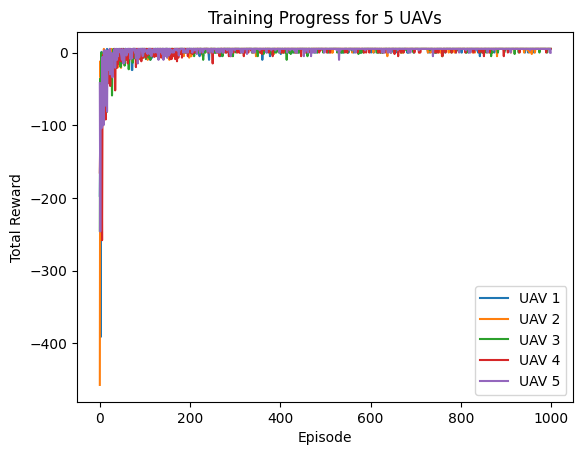

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
import matplotlib.pyplot as plt

# UAV Environment
class EnhancedSmallUAVEnv:
    def __init__(self):
        self.position = [0, 0]
        self.goal = [3, 3]
        self.actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        self.grid_size = 4

    def reset(self):
        self.position = [0, 0]
        return self.get_state()

    def get_state(self):
        dx = self.goal[0] - self.position[0]
        dy = self.goal[1] - self.position[1]
        return [self.position[0], self.position[1], dx, dy]

    def step(self, action):
        new_position = [self.position[0] + self.actions[action][0], self.position[1] + self.actions[action][1]]
        if new_position[0] < 0 or new_position[0] >= self.grid_size or new_position[1] < 0 or new_position[1] >= self.grid_size:
            return self.get_state(), -5, False
        self.position = new_position
        if self.position == self.goal:
            return self.get_state(), 10, True
        return self.get_state(), -1, False

# Actor Model
class Actor(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Actor, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return torch.softmax(self.fc2(x), dim=-1)

# Critic Model
class Critic(nn.Module):
    def __init__(self, input_dim):
        super(Critic, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

# Training Function
def train_actor_critic(env, actor, critic, actor_optimizer, critic_optimizer, episodes=1000):
    gamma = 0.99
    criterion = nn.MSELoss()
    rewards_list = []

    for episode in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0

        while not done:
            state_tensor = torch.tensor(state, dtype=torch.float32)
            action_probs = actor(state_tensor)
            action_dist = torch.distributions.Categorical(action_probs)
            action = action_dist.sample().item()

            next_state, reward, done = env.step(action)
            total_reward += reward

            # Critic Update
            next_state_tensor = torch.tensor(next_state, dtype=torch.float32)
            target_value = reward + gamma * critic(next_state_tensor) * (1-int(done))
            value = critic(state_tensor)
            critic_loss = criterion(value, target_value.detach())
            critic_optimizer.zero_grad()
            critic_loss.backward(retain_graph=True)
            critic_optimizer.step()

            # Actor Update
            advantage = (target_value - value).detach()  # Detach the advantage calculation
            actor_loss = -action_dist.log_prob(torch.tensor(action)) * advantage
            actor_optimizer.zero_grad()
            actor_loss.backward()
            actor_optimizer.step()

            state = next_state

        rewards_list.append(total_reward)
        print(f"Episode {episode + 1}/{episodes}, Total Reward: {total_reward}")

    return rewards_list

# Main Execution for 5 UAVs
num_uavs = 5
all_rewards = []

for i in range(num_uavs):
    print(f"\nTraining UAV {i + 1}...\n")
    env = EnhancedSmallUAVEnv()
    actor = Actor(input_dim=4, output_dim=4)
    critic = Critic(input_dim=4)
    actor_optimizer = optim.Adam(actor.parameters(), lr=0.0001)
    critic_optimizer = optim.Adam(critic.parameters(), lr=0.0001)
    rewards = train_actor_critic(env, actor, critic, actor_optimizer, critic_optimizer, episodes=1000)
    all_rewards.append(rewards)

# Plotting
for i, rewards in enumerate(all_rewards):
    plt.plot(rewards, label=f"UAV {i + 1}")
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.title('Training Progress for 5 UAVs')
plt.show()
